# Project 4

In addition to answering the bolded questions on Coursera, also attach your notebook, both as `.ipynb` and `.html`.

This project should be answered using the `Weekly` data set (attached). This data contains 1,089
weekly stock market percentage returns for 21 years, from the beginning of 1990 to the end of 2010.

Details about the columns in the data are summarized below:

- `Year` : The year that the observation was recorded
- `Lag1` : Percentage return for previous week
- `Lag2` : Percentage return for 2 weeks previous
- `Lag3` : Percentage return for 3 weeks previous
- `Lag4` : Percentage return for 4 weeks previous
- `Lag5` : Percentage return for 5 weeks previous
- `Volume` : Volume of shares traded (average number of daily shares traded in billions)
- `Today` : Percentage return for this week
- `Direction` : A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please copy these lines into the Terminal!

In [2]:
# !pip install pandas==1.0.5 --user
# pip install penngrader --user

In [3]:
# pip install seaborn --user
# pip install scikit-learn --user
# pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [4]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 59816498                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Chukwuka Osakwe"     # YOUR FULL NAME GOES HERE

In [5]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Spring_2021_HW4', student_id = STUDENT_ID)

In [6]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

We're also going to run a quick (0-point) check that the pandas version set up here is correct. If you fail this, please open a Terminal window and run `pip install pandas==1.0.5 --user` otherwise none of the tests will work!

In [7]:
grader.grade(test_case_id = 'A0_pandas_test', answer = str(pd.__version__))

You earned -0.01/0 points.

But, don't worry you can re-submit and we will keep only your latest score.


## Part A

We are first interested in trying to predict the direction of the returns.

To start, load `Weekly.csv` into your notebook.

In [8]:
weekly = pd.read_csv("Weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [9]:
grader.grade(test_case_id = 'A0_weekly_test', answer = weekly)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A1.

First, transform our `Direction` variable into a numerical feature that is equal to 1 if `Direction = Up`. Then, pass the dataframe into the test case to make sure it's working properly!

In [10]:
# First we encode the qualitative variable direction into a binary 1 for Up 0 for Down
encode = lambda x: 1 if x == "Up" else 0

weekly["Direction"] = weekly["Direction"].apply(encode)
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [11]:
grader.grade(test_case_id = 'A1_direction_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

               Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519   
Lag1      -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183   
Lag2      -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499   
Lag3      -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657   
Lag4      -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675   
Lag5      -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000   
Volume     0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517   
Today     -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013   
Direction -0.022200 -0.050004  0.072696 -0.022913 -0.020549 -0.018168   

             Volume     Today  Direction  
Year       0.841942 -0.032460  -0.022200  
Lag1      -0.064951 -0.075032  -0.050004  
Lag2      -0.085513  0.059167   0.072696  
Lag3      -0.069288 -0.071244  -0.022913  
Lag4      -0.061075 -0.007826  -0.020549  
Lag5      -

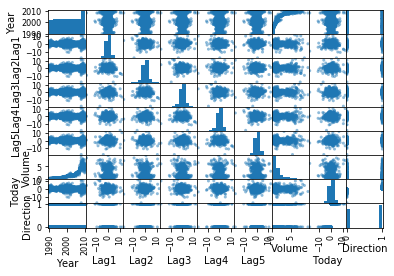

In [12]:
# plot matrix of pairwise scatter plots to see relationships in the data
axes = pd.plotting.scatter_matrix(weekly)
print(weekly.corr())

Include a brief description of what relationshipis and correlations you find.

In [13]:
relationships = '''
there appears to be a correlation between year and volume. No other clear relationship between the variable
'''

In [14]:
grader.grade(test_case_id = 'A1_relationships_test', answer = relationships)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A2.

Use the full data set to perform a logistic regression with `Direction` as the response and the
five lag variables as predictors.

In [20]:
# run a logistic regression
fit1 = smf.glm("Direction~ Lag1+Lag2+Lag3+Lag4+Lag5", data= weekly, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1083
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.37
Date:                Tue, 09 Feb 2021   Deviance:                       1486.7
Time:                        19:59:47   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.0

Pass in the regression equation to `logit_equation` below. Hint: You do not need the coefficients of the equation yet, just which variables you want to include in the model. Your answer should look something like `Response~Var1+Var2` which is the input for `statsmodels.formula.api`. 

In [29]:
logit_equation = "Direction~Lag1+Lag2+Lag3+Lag4+Lag5"

In [30]:
grader.grade(test_case_id = 'A2_logit_test', answer = logit_equation)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [31]:
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1083
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.37
Date:                Tue, 09 Feb 2021   Deviance:                       1486.7
Time:                        20:01:56   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.0

Type the number of apparently significant variables into `num_significant` and the names of the variables into the list `var_significant` -- the test case will only give points if both variables are correct!

In [34]:
num_significant = 1
var_significant = ["Lag2"] # This should be a list!

In [35]:
grader.grade(test_case_id = 'A3_significant_test', answer = (num_significant, var_significant))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Compute the overall fraction of correct predictions. Name this variable `fraction_correct_all`.
What is the overall fraction of correct predictions?

In [47]:
from sklearn.metrics import accuracy_score
encode = lambda x: 1 if x > 0.5 else 0
predictions = pd.DataFrame({"Direction" : [encode(x) for x in fit1.predict()]})
predictions.head()

fraction_correct_all = accuracy_score(weekly["Direction"], predictions["Direction"])
fraction_correct_all

0.5629017447199265

In [48]:
print(f'Overall fraction of correct predictions is {fraction_correct_all}')

Overall fraction of correct predictions is 0.5629017447199265


In [49]:
grader.grade(test_case_id = 'A4_fraction_test', answer = fraction_correct_all)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Now fit the logistic regression model using a training data period from 1990 to 2007, with
`Lag2` as the only predictor. 

Compute the overall fraction of correct predictions for the held
out data (that is, the data from 2008, 2009 and 2010) and assign it to a variable called
`fraction_correct_test`. What is the overall fraction of correct predictions?

In [63]:
# Train and test split
train_filter_list =["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007"]
test_filter_list =["2008","2009","2010"]

train = weekly[weekly["Year"].isin(train_filter_list)]
test = weekly[weekly["Year"].isin(test_filter_list)]
# Model 

# fit regression with training data from 1990 to 2007
fit2 = smf.glm("Direction~ Lag2", data= train, family=sm.families.Binomial()).fit()
print(fit2.summary())

# find the predictions for each line in the test set
yprobs = fit2.predict(test["Lag2"])
print("-------")
print(yprobs)

# calculate predictions on test set
ypred = [0 if y<0.5 else 1 for y in yprobs]

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  933
Model:                            GLM   Df Residuals:                      931
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -639.25
Date:                Tue, 09 Feb 2021   Deviance:                       1278.5
Time:                        20:38:03   Pearson chi2:                     933.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2266      0.066      3.422      0.0

In [64]:
fraction_correct_test = accuracy_score(test["Direction"],ypred)

In [65]:
print(f'Overall fraction of correct predictions is {fraction_correct_test}')

Overall fraction of correct predictions is 0.5512820512820513


Pass in the train and test datasets to make sure that they're working (feel free to rename the variables in the test case), and then run the test for `fraction_correct_test`!

In [66]:
grader.grade(test_case_id = 'A5_df_test', answer = (train, test)) 

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [67]:
grader.grade(test_case_id = 'A5_fraction_correct_test', answer = fraction_correct_test) 

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Now, we want to develop an investment strategy in which we buy if the returns are greater than
$0.5\%$ and sell otherwise.

### B1. 
Create a response variable, `y_i` such that

$$
y_i = \begin{cases}
1 \text{ if Today } > 0.5 &\\
0 \text{ otherwise }
\end{cases}
$$

In [74]:
# run another logistic regression with a new variable
encode = [lambda x: 1 if x>0.5 else 0]
weekly["Response"] = weekly["Today"].apply(encode)
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,y_i,Response
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1,1,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1,1,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1,0,0
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1,1,1


In [75]:
grader.grade(test_case_id = 'B1_response_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B2.
Fit a logistic regression model using a training data period from 1990 to 2008, with the five
lag variables and volume as predictors.

In [90]:
# Train and test split
train_filter_list =["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008"]
test_filter_list =["2009","2010"]

train = weekly[weekly["Year"].isin(train_filter_list)]
test = weekly[weekly["Year"].isin(test_filter_list)]

# fit regression with training data from 1990 to 2007
fit3 = smf.glm("Response~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume", data= train, family=sm.families.Binomial()).fit()
print(fit3.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  985
Model:                            GLM   Df Residuals:                      978
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.06
Date:                Tue, 09 Feb 2021   Deviance:                       1342.1
Time:                        20:53:49   Pearson chi2:                     985.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.4

Pass in the regression equation to `logit_equation_B` below

In [91]:
logit_equation_B = "Response~Lag1+Lag2+Lag3+Lag4+Lag5+Volume"

In [92]:
grader.grade(test_case_id = 'B2_logit_test', answer = logit_equation_B)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [94]:
print(fit3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  985
Model:                            GLM   Df Residuals:                      978
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.06
Date:                Tue, 09 Feb 2021   Deviance:                       1342.1
Time:                        20:54:21   Pearson chi2:                     985.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.4

Type the number of apparently significant variables into `num_significant_B` and the names of the variables into the list `var_significant_B` -- the test case will only give points if both variables are correct!

In [96]:
num_significant_B = 1
var_significant_B = ["Lag1"] # This has to be a list!

In [97]:
grader.grade(test_case_id = 'B3_significant_test', answer = (num_significant_B, var_significant_B))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Compute the overall fraction of correct predictions for the held out data (that is, the data
from 2009 and 2010). Assign this value to the variable `fraction_correct`. What is the
overall fraction of correct predictions?

In [98]:
# find the predictions for each line in the test set
yprobs = fit3.predict(test)
print("-------")
print(yprobs)


# calculate predictions on test set
ypred = [0 if y<0.5 else 1 for y in yprobs]


# print accuracy score
fraction_correct = accuracy_score(test["Response"],ypred)

-------
985     0.274179
986     0.478373
987     0.358876
988     0.323691
989     0.330751
          ...   
1084    0.400585
1085    0.305142
1086    0.375705
1087    0.366345
1088    0.379430
Length: 104, dtype: float64


In [99]:
print(f'Overall fraction of correct predictions is {fraction_correct}')

Overall fraction of correct predictions is 0.5


In [100]:
grader.grade(test_case_id = 'B4_fraction_test', answer = fraction_correct)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.